In [1]:
import os
import pickle

from sklearn.model_selection import StratifiedKFold, cross_validate

from constants import RANDOM_STATE

In [2]:
DATA_FILENAME = "data_train.pkl"
SCORES_FILENAME = "models.json"

if not os.path.exists(DATA_FILENAME):
    raise Exception("Data file not found. Run train.py first.")

with open(DATA_FILENAME, "rb") as f:
    data, labels = pickle.load(f)

In [3]:
# Ensuring same splits for all models.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

results: dict[str, tuple[list[float], list[float]]] = {}

In [4]:
# SVC
from sklearn.svm import SVC

svc = SVC(kernel="rbf", random_state=RANDOM_STATE)

result = cross_validate(
    svc,
    data,  # type: ignore
    labels,
    cv=cv,
    scoring=("accuracy", "balanced_accuracy"),
)

acc = result["test_accuracy"].tolist()
b_acc = result["test_balanced_accuracy"].tolist()

results["SVC"] = (acc, b_acc)

In [5]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

result = cross_validate(
    knn,
    data,  # type: ignore
    labels,
    cv=cv,
    scoring=("accuracy", "balanced_accuracy"),
)

acc = result["test_accuracy"].tolist()
b_acc = result["test_balanced_accuracy"].tolist()

results["KNN"] = (acc, b_acc)

In [6]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_STATE)

result = cross_validate(
    rf,
    data,  # type: ignore
    labels,
    cv=cv,
    scoring=("accuracy", "balanced_accuracy"),
)

acc = result["test_accuracy"].tolist()
b_acc = result["test_balanced_accuracy"].tolist()

results["Random Forest"] = (acc, b_acc)

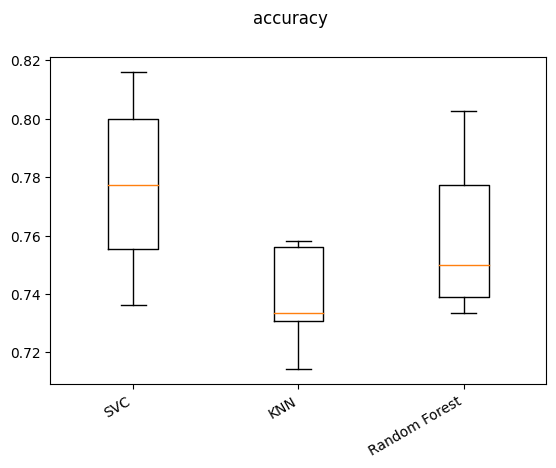

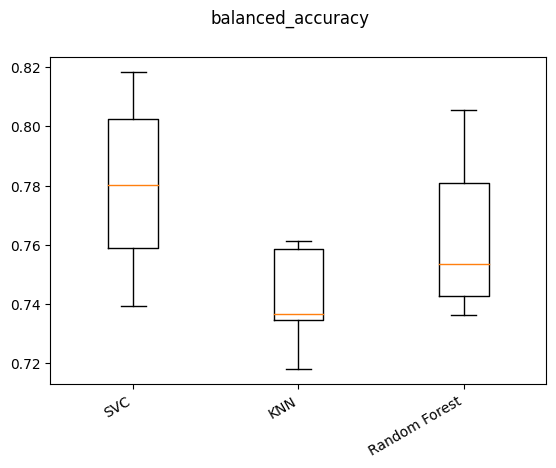

,accuracy,balanced_accuracy
SVC,0.777033,0.779774
Random Forest,0.760548,0.763731
KNN,0.738596,0.741738


In [7]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["accuracy", "balanced_accuracy"]
)

fig = plt.figure()
fig.suptitle("accuracy")
ax = fig.add_subplot(111)
ax.boxplot(results_df["accuracy"], labels=results_df.index)  # type: ignore
fig.autofmt_xdate()
plt.show()

fig = plt.figure()
fig.suptitle("balanced_accuracy")
ax = fig.add_subplot(111)
ax.boxplot(results_df["balanced_accuracy"], labels=results_df.index)  # type: ignore
fig.autofmt_xdate()
plt.show()

results_df["accuracy"] = results_df["accuracy"].apply(lambda x: np.mean(x))
results_df["balanced_accuracy"] = results_df["balanced_accuracy"].apply(
    lambda x: np.mean(x)
)

results_df.sort_values(by="accuracy", inplace=True, ascending=False)
results_df.to_json(SCORES_FILENAME, indent=4)

results_df